<a href="https://colab.research.google.com/github/aymenchibouti/newversion/blob/master/opntuna_model_res.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap
!pip install lime
!pip install optuna
!pip install joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7006c7acb9ac8b94602994371db68b6b9639ddf51aa26130b0e61cd4ac9fe9f9
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 22.4 MB/s eta 0:00:00


Dataset shape: (120542, 214)

First few rows:
   day_1_access  day_1_problem  day_1_wiki  day_1_discussion  day_1_navigate  \
0             3              8           0                 0               1   
1             7             14           0                 0               4   
2            18              5           0                 0               4   
3             0              0           0                 0               2   
4            12              2           0                 0               5   

   day_1_page_close  day_1_video  day_2_access  day_2_problem  day_2_wiki  \
0                 1            0             0              0           0   
1                 2            1             0              0           0   
2                 2            2             0              0           0   
3                 0            0            28             16           0   
4                 2            2             0              0           0   

   ...  da

[I 2025-08-23 14:38:43,382] A new study created in memory with name: no-name-93599623-e4e3-47c4-9807-d14a18d18761
[I 2025-08-23 14:41:48,327] Trial 0 finished with value: 0.8518038421268572 and parameters: {'n_estimators': 477, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False}. Best is trial 0 with value: 0.8518038421268572.
[I 2025-08-23 15:44:25,056] Trial 1 finished with value: 0.8445863825854214 and parameters: {'n_estimators': 287, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': None, 'bootstrap': False}. Best is trial 0 with value: 0.8518038421268572.
[I 2025-08-23 15:48:28,904] Trial 2 finished with value: 0.864061013544131 and parameters: {'n_estimators': 270, 'max_depth': 17, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 2 with value: 0.864061013544131.
[I 2025-08-23 15:49:39,947] Trial 3 finished with value: 0.8637706636058532 a


Best trial:
  Value:  0.8654091051578314
  Params: 
    n_estimators: 200
    max_depth: 20
    min_samples_split: 16
    min_samples_leaf: 2
    max_features: sqrt
    bootstrap: True

Optimized Random Forest Performance:
Accuracy: 0.8596
ROC AUC: 0.8526

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.49      0.59      4992
           1       0.88      0.96      0.92     19117

    accuracy                           0.86     24109
   macro avg       0.81      0.72      0.75     24109
weighted avg       0.85      0.86      0.85     24109


Confusion Matrix:
[[ 2449  2543]
 [  843 18274]]

Top 20 Most Important Features:
               feature  importance
140      day_21_access    0.036773
0         day_1_access    0.033045
98       day_15_access    0.032872
42        day_7_access    0.027756
49        day_8_access    0.026954
147      day_22_access    0.026221
91       day_14_access    0.024543
7         day_2_access    0.0

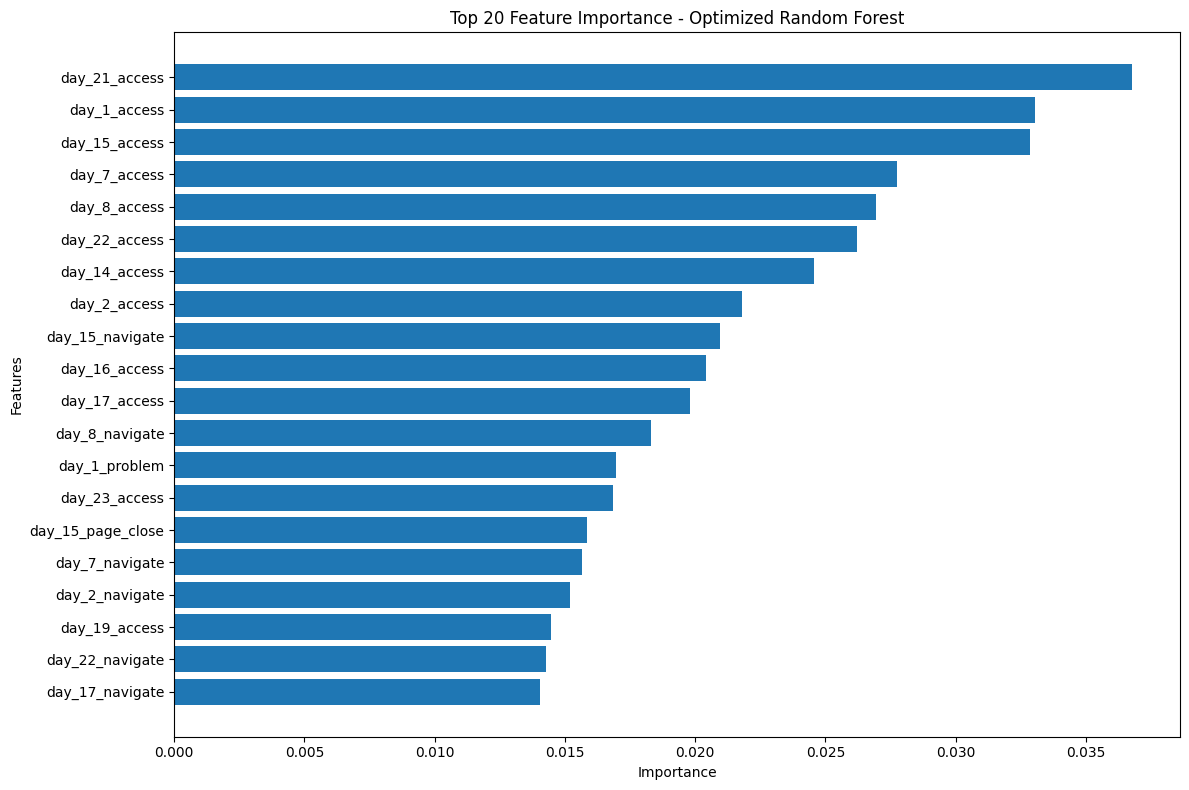

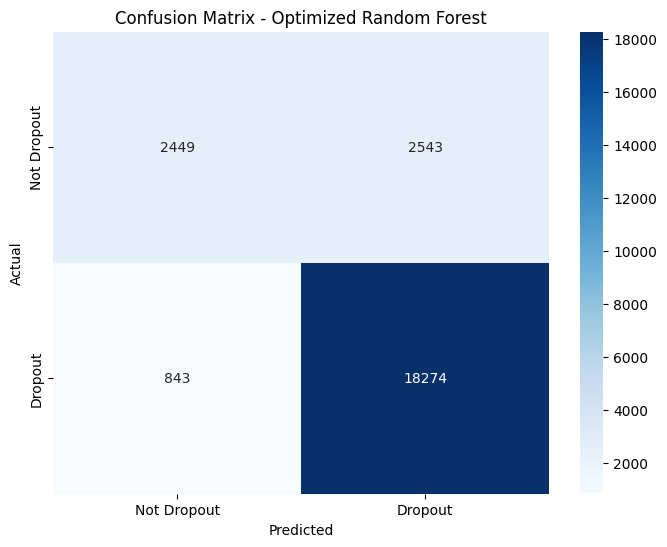

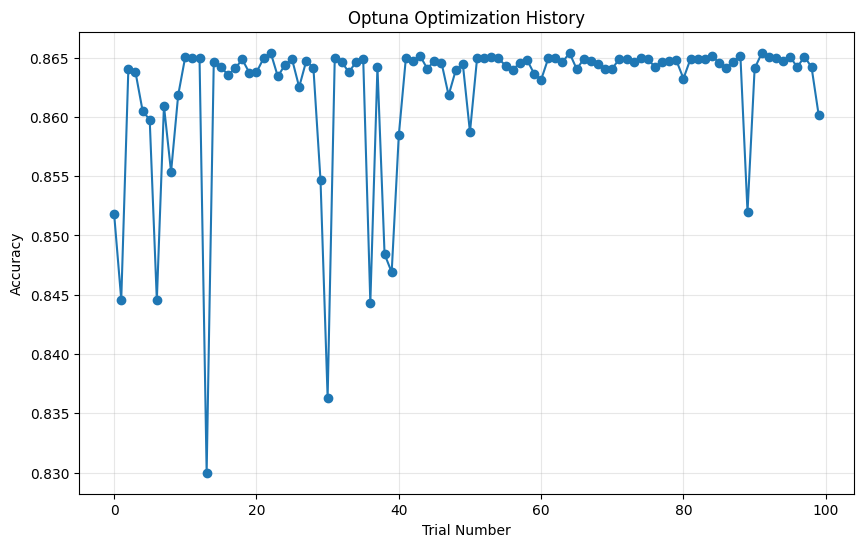

/tmp/ipython-input-3723601797.py:139: ExperimentalWarning: optuna.visualization.matplotlib._param_importances.plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


<Figure size 1000x600 with 0 Axes>

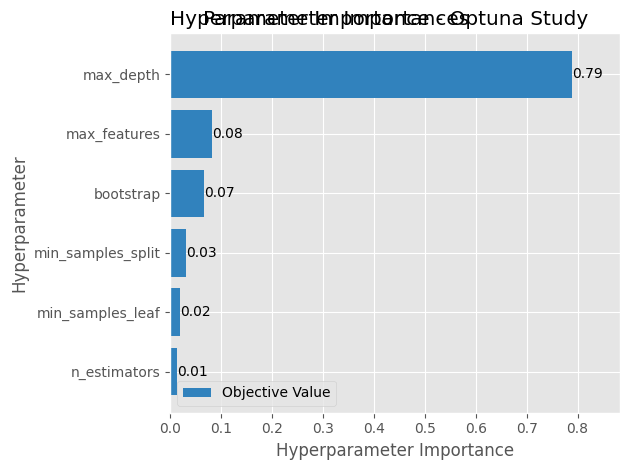


Top 20 Features by Permutation Importance:
               feature  importance
1        day_1_problem    0.000767
154      day_23_access    0.000693
0         day_1_access    0.000485
77       day_12_access    0.000469
119      day_18_access    0.000460
53      day_8_navigate    0.000431
102    day_15_navigate    0.000431
161      day_24_access    0.000431
98       day_15_access    0.000423
165    day_24_navigate    0.000398
25      day_4_navigate    0.000390
158    day_23_navigate    0.000336
159  day_23_page_close    0.000311
11      day_2_navigate    0.000294
200    day_29_navigate    0.000294
89   day_13_page_close    0.000282
196      day_29_access    0.000278
3     day_1_discussion    0.000274
175      day_26_access    0.000274
179    day_26_navigate    0.000265


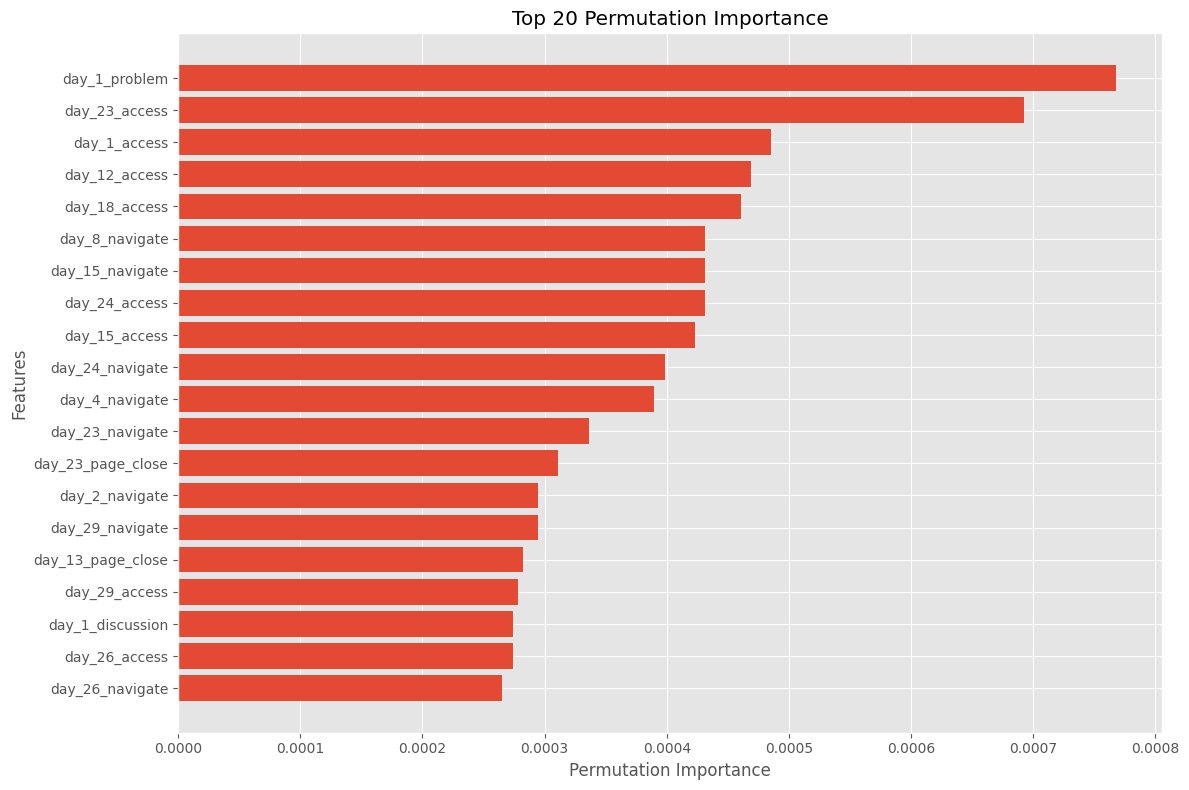


COMPARISON WITH PREVIOUS MODEL

Previous Model:
Accuracy: 0.8500
ROC AUC: 0.8700

Optimized Random Forest:
Accuracy: 0.8596
ROC AUC: 0.8526

Improvement:
Accuracy: +0.0096
ROC AUC: -0.0174

Model training and evaluation completed!
Visualizations saved as PNG files
Model saved as 'optimized_random_forest_model.pkl'


In [2]:
import pandas as pd
import numpy as np
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
import joblib

# Load the dataset
data = pd.read_csv('model1_210_features.csv')

# Display basic information about the dataset
print("Dataset shape:", data.shape)
print("\nFirst few rows:")
print(data.head())
print("\nColumn names:")
print(data.columns.tolist())
print("\nTarget variable distribution:")
print(data['dropout'].value_counts())

# Separate features and target
X = data.drop(['enrollment_id', 'username', 'course_id', 'dropout'], axis=1)
y = data['dropout']

# Check for missing values
print("\nMissing values:")
print(X.isnull().sum().sum())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define objective function for Optuna optimization
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_1
        .int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42
    }

    .00:
    model = RandomForestClassifier(**params)
    score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    return score

# Optimize with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("\nBest trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Train final model with best parameters
best_params = trial.params
best_params['random_state'] = 42
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_rf.predict(X_test_scaled)
y_pred_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nOptimized Random Forest Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance analysis
feature_importance = best_rf.feature_importances_
feature_names = X.columns

# Create feature importance dataframe
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nTop 20 Most Important Features:")
print(importance_df.head(20))

# Visualization 1: Feature Importance Plot
plt.figure(figsize=(12, 8))
top_features = importance_df.head(20)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 20 Feature Importance - Optimized Random Forest')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 2: Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Dropout', 'Dropout'],
            yticklabels=['Not Dropout', 'Dropout'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Optimized Random Forest')
plt.savefig('rf_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 3: Optuna Optimization History
plt.figure(figsize=(10, 6))
plt.plot(study.trials_dataframe()['number'], study.trials_dataframe()['value'], 'o-')
plt.xlabel('Trial Number')
plt.ylabel('Accuracy')
plt.title('Optuna Optimization History')
plt.grid(True, alpha=0.3)
plt.savefig('optuna_optimization_history.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 4: Parameter Importance from Optuna
plt.figure(figsize=(10, 6))
optuna.visualization.matplotlib.plot_param_importances(study)
plt.title('Parameter Importance - Optuna Study')
plt.tight_layout()
plt.savefig('optuna_param_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Permutation Importance for more robust feature importance
perm_importance = permutation_importance(best_rf, X_test_scaled, y_test, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': perm_importance.importances_mean
}).sort_values('importance', ascending=False)

print("\nTop 20 Features by Permutation Importance:")
print(perm_importance_df.head(20))

# Visualization 5: Permutation Importance
plt.figure(figsize=(12, 8))
top_perm_features = perm_importance_df.head(20)
plt.barh(top_perm_features['feature'], top_perm_features['importance'])
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.title('Top 20 Permutation Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('permutation_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Save the trained model
joblib.dump(best_rf, 'optimized_random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Compare with previous model (you would replace this with your actual previous model results)
print("\n" + "="*50)
print("COMPARISON WITH PREVIOUS MODEL")
print("="*50)

# Assuming previous model had these results (replace with your actual values)
previous_accuracy = 0.85  # Replace with your previous model's accuracy
previous_auc = 0.87       # Replace with your previous model's AUC

print(f"\nPrevious Model:")
print(f"Accuracy: {previous_accuracy:.4f}")
print(f"ROC AUC: {previous_auc:.4f}")

print(f"\nOptimized Random Forest:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

print(f"\nImprovement:")
print(f"Accuracy: {accuracy - previous_accuracy:+.4f}")
print(f"ROC AUC: {roc_auc - previous_auc:+.4f}")

# Additional analysis: Learning curve would be helpful but requires more code
# You might want to add learning curve visualization in the future

print("\nModel training and evaluation completed!")
print("Visualizations saved as PNG files")
print("Model saved as 'optimized_random_forest_model.pkl'")